# Linear regression basics

6 September 2021

---

Fitting, estimating parameters, estimating z-values and p-values.

From <b>Chapter 2 of Hastie, Tibshirani and Friedman "Elements of Statistical Learning"</b>

To do:
- Calculate the p-values (done)
- t-distribution for z (done)
- Chi^2 distribution for the sample variance (done)
    - Distribution of the sum of squares of normally distributed random variables
    
- Understand F-statistics
- Calculate the confidence intervals for each of the parameters in the model
- Fit different models to data and determine which is the best based on the z- and F-statistics
- Generate the confidence set

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import inv as invert
from numpy import matmul as multiply
from numpy import diag as diagonal
from numpy import repeat as repeat

sns.set()
%matplotlib inline

## Functions for estimating stuff

Regression coefficients, z-scores p-values

In [191]:
def estimate_beta(X, y):
    """
    Estimate the parameters of the linear regression model,
    assuming y = X * beta
    
    Args
    -----
    X: np.array of shape (num_examples, p + 1)
    y: np.array of shape (num_examples, num_trials)
    
    where p is the dimensionality of the data
    and num_trials is the number of trials run
    
    Return
    ------
    beta: np.array of shape (p + 1, num_trials)
    
    """
    beta_est = multiply(multiply(invert(multiply(X.T, X)), X.T), y)
    return beta_est

def estimate_sigma(X, y):
    """
    Estimate the standard deviation of the Gaussian noise
    in the linear model
    
    Args
    ----
    X: np.array of shape (num_examples, p + 1)
    y: np.array of shape (num_examples, num_trials)
    
    where p is the dimensionality of the data
    and num_trials is the number of trials run
    
    Return
    ------
    sigma2_est: np.array of shape (p + 1, num_trials) estimating the variance
    
    """
    num_examples, p = X.shape
    beta_est = estimate_beta(X, y)
    y_est = multiply(X, beta_est)
    
    sigma_est = np.sqrt(np.sum((ys - y_est)**2, axis=0) / (num_examples - p - 1))
    return sigma_est.reshape(1, -1)

def estimate_z(X, y):
    """
    Calculate the z-statistics for each of the parameters
    in the linear model
    
    Args
    ----
    X: np.array of shape (num_examples, p + 1)
    y: np.array of shape (num_examples, num_trials)
    
    where p is the dimensionality of the data
    and num_trials is the number of trials run
    
    Return
    ------
    beta: np.array of shape (p + 1, num_trials)
    
    """
    p, num_trials = y.shape
    
    beta_est = estimate_beta(X, y)
    sigma_est = estimate_sigma(X, y)
    V = invert(multiply(X.T, X))
    
    v = repeat(diagonal(V).reshape(-1, 1), num_trials, axis=1)
    z = (beta_est / (sigma_est * np.sqrt(v)))
    
    return z

## Generate some data

In [100]:
num_trials = 2**12
num_points = 64

sigma = np.sqrt(2.5)

# model: y = 1 + 2.5x
beta = np.array([[1, 2.5]]).T

x = np.arange(1, 10, 9 / num_points)
X = np.concatenate([np.ones(num_points).reshape(-1, 1), x.reshape(-1, 1)], axis=1)

In [4]:
# exact model
y_true = multiply(X, beta)

In [5]:
# measured values
ys = []

for n in range(0, num_trials):
    y = y_true + sigma * np.random.randn(num_points).reshape(-1, 1)
    ys.append(y)

In [6]:
ys = np.concatenate(ys, axis=1)

## Plot data

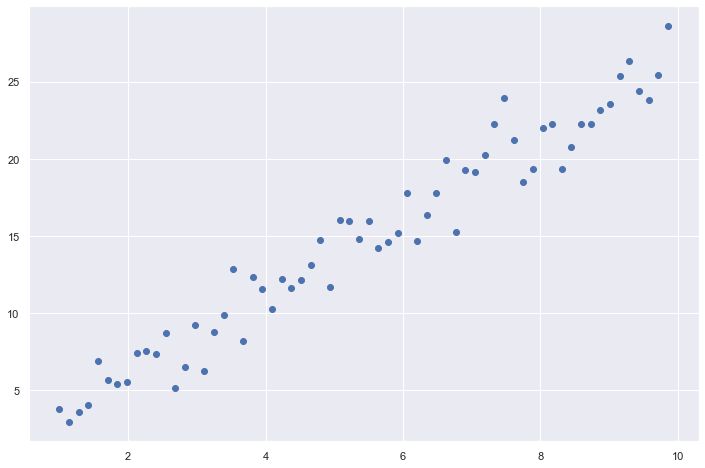

In [8]:
plt.figure(figsize=(12, 8))
plt.scatter(x, ys[:, 0])
plt.show()

## Parameter estimates and z-scores

In [207]:
beta_est = estimate_beta(X, ys)
sigma_est = estimate_sigma(X, ys)
z = estimate_z(X, ys)

In [208]:
# estimate the best fit
y_pred = multiply(X, beta_est)

In [209]:
# plot the distribution of the values of beta
beta_est.shape

(2, 4096)

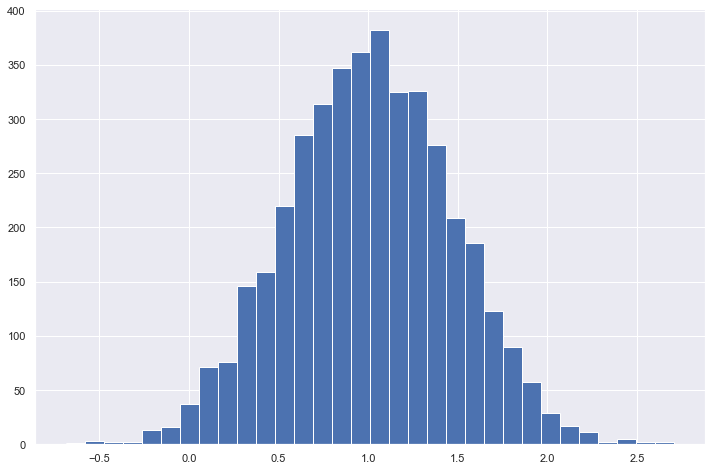

In [210]:
# beta0 estimates
plt.figure(figsize=(12, 8))
plt.hist(beta_est[0, :], bins=32)
plt.show()

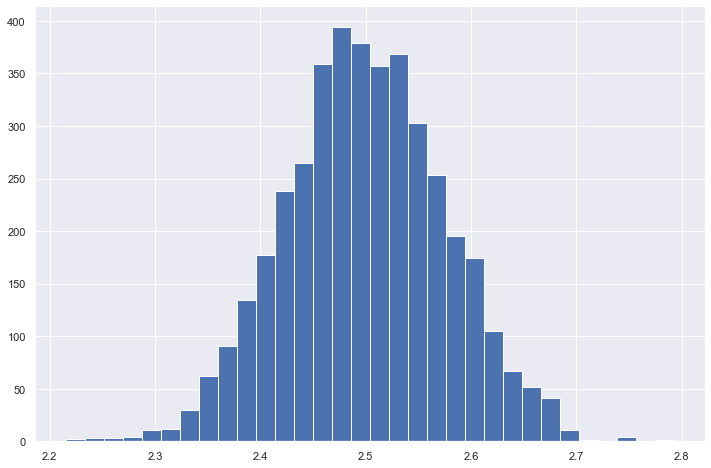

In [211]:
# beta1 estimates
plt.figure(figsize=(12, 8))
plt.hist(beta_est[1, :], bins=32)
plt.show()

In [212]:
beta_est.mean(axis=1), beta_est.var(axis=1)

(array([1.00703203, 2.49948603]), array([0.21485678, 0.0057842 ]))

In [213]:
# distribution of z-scores

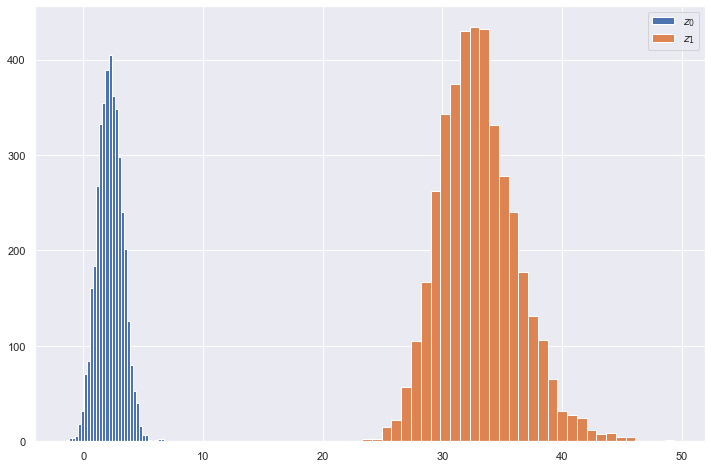

In [220]:
plt.figure(figsize=(12, 8))
plt.hist(z[0, :], bins=32, label='$z_0$')
plt.hist(z[1, :], bins=32, label='$z_1$')
plt.legend()
plt.show()

## Calculate the p-values

<b>Null hypothesis</b>: that the value of $\beta_j = 0$.

Under null hypothesis, $z_j$ distributed according to $t$ distribution with $N - p - 1$ degrees of freedom.

What is the probability of getting a value at least as large as a given $z_j$ value, under the null hypothesis?

In [222]:
from scipy.stats import t

In [236]:
z = z[0, 0]

In [238]:
p = 1-t.cdf(z, df=62)

## Plot data with estimated best fit

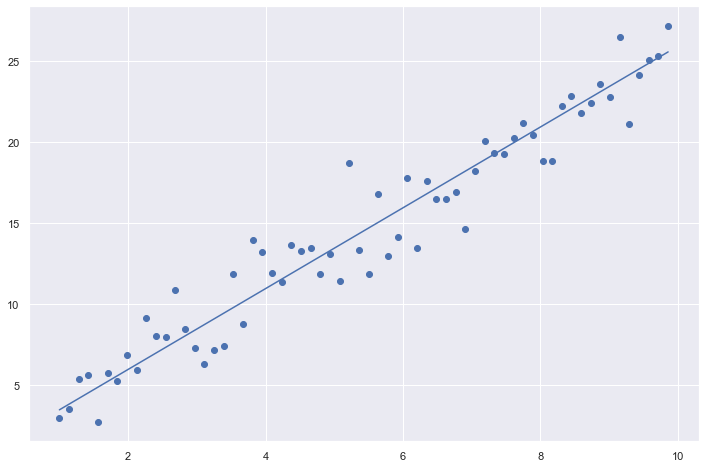

In [27]:
plt.figure(figsize=(12, 8))
plt.scatter(x, y)
plt.plot(x, y_pred[:, 0])
plt.show()

## Calculate the z-scores and p-values